# Best League of Legends champions in S13, patch 13.1.

## Game description:

* League of Legends (LoL) is an online multiplayer video game developed and published by Riot Games. It falls under the category of a multiplayer online battle arena (MOBA) game, where two teams, each consisting of five players, compete against each other.
* In League of Legends, players assume the role of a "champion," a powerful and unique character with various abilities and playstyles. The game offers a wide range of champions to choose from, each with their own strengths, weaknesses, and distinct playstyles. These champions are divided into different roles, such as tanks, mages, assassins, marksmen, and support, which define their primary functions within a team.

## Objective in this project:

* To determine the best champions and roles for climbing the leaderboard in League of Legends, we can analyze the dataset [League of Legends Stats: S13](https://www.kaggle.com/datasets/vivovinco/league-of-legends-stats-s13). This dataset provides valuable information and statistics about the game, which can help identify the champions and roles that have a higher likelihood of success.
* By examining the dataset, we can look for patterns and trends in terms of win rates, pick rates, and other relevant metrics. Champions with consistently high win rates across a significant number of games can be considered strong contenders for climbing the leaderboard. It's important to note that the effectiveness of champions and roles can vary depending on the current state of the game, balance patches, and the specific strategies employed by players. Therefore, while the dataset can provide valuable insights, it's essential to stay up to date with the latest patches, balance changes, and meta shifts
***Note:
This analysis is specific to patch 13.1 because the game is always changing and it might or might not be very different from patch to patch***

## Data Preparation

Here we will prepare and clean the data (if necessary) before performing any analysis on our dataset.



In [8]:
import pandas as pd

First, let's load the dataset using 'pd.read_csv' function and then look at different informations about it.

In [9]:
df = pd.read_csv('league-of-legends-champion-stats-13.1.csv', delimiter=';')

In [10]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68%,91.63%,6.62%,11.98%,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50%,94.65%,5.81%,1.73%,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41%,75.74%,8.11%,13.02%,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92%,23.50%,2.55%,13.02%,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62%,66.03%,2.75%,3.79%,2.26
...,...,...,...,...,...,...,...,...,...,...,...
239,Zilean,Support,MID,A,51.52,-3.47,53.33%,15.52%,0.49%,1.40%,3.59
240,Zilean,Support,SUPPORT,A,48.35,-2.49,50.95%,79.72%,2.67%,1.40%,3.11
241,Zoe,Mage,MID,A,48.46,2.43,49.14%,87.85%,3.45%,1.45%,2.60
242,Zoe,Mage,SUPPORT,D,28.33,-3.55,47.73%,10.03%,0.37%,1.45%,2.14


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    244 non-null    object 
 1   Class   243 non-null    object 
 2   Role    244 non-null    object 
 3   Tier    244 non-null    object 
 4   Score   244 non-null    float64
 5   Trend   244 non-null    float64
 6   Win %   244 non-null    object 
 7   Role %  244 non-null    object 
 8   Pick %  244 non-null    object 
 9   Ban %   244 non-null    object 
 10  KDA     244 non-null    float64
dtypes: float64(3), object(8)
memory usage: 21.1+ KB


In [12]:
df.isna().sum()

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [13]:
missing_class = df['Class'].isna()
name_with_missing_class = df.loc[missing_class, 'Name']
print(name_with_missing_class)


71    K'Sante
Name: Name, dtype: object


Looks like the Class data for K'Sante is missing, let's fix it.

In [14]:
df.loc[df['Name'] == "K'Sante", "Class"] = "Tank"
# We changed the missing value to Tank, since we know his Class from our knowledge

In [15]:
df.loc[69:75]

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
69,Jhin,Marksman,ADC,God,83.12,3.82,51.43%,92.56%,17.41%,3.40%,3.06
70,Jinx,Marksman,ADC,B,47.97,-3.01,50.67%,98.56%,7.44%,0.54%,2.32
71,K'Sante,Tank,TOP,S,62.32,-15.10,47.52%,93.24%,7.24%,15.11%,1.97
72,Kai'Sa,Marksman,ADC,God,81.95,-1.78,50.83%,96.92%,18.91%,3.81%,2.51
73,Kalista,Marksman,ADC,D,27.85,-2.37,47.95%,86.37%,2.66%,0.76%,2.22
74,Karma,Mage,SUPPORT,God,71.63,9.20,49.52%,83.31%,9.99%,3.42%,2.80
75,Karma,Mage,MID,B,47.01,0.00,50.63%,10.41%,1.29%,3.42%,3.17


We also have to remove the '%' from the columns and transform them from strings to floats so we can perform operations on them.

In [16]:
df['Win %'] = df['Win %'].str.rstrip('%').astype(float)
df['Role %'] = df['Role %'].str.rstrip('%').astype(float)
df['Ban %'] = df['Ban %'].str.rstrip('%').astype(float)
df['Pick %'] = df['Pick %'].str.rstrip('%').astype(float)

Looks like the dataframe is in a good condition now, now we can start doing some analysis

## Exploratory Analysis and Visualization

**Here we'll do our analysis and visualization**



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Let's look at some statistics first**

In [19]:
df.describe()

,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,50.000164,-0.677992,50.230615,62.443238,3.940779,5.479262,2.371230
std,13.587751,9.378966,1.771772,32.286623,3.507838,7.233010,0.410697
min,21.300000,-35.520000,44.030000,10.020000,0.140000,0.140000,1.480000
25%,41.462500,-4.522500,49.297500,26.145000,1.290000,0.850000,2.080000
50%,47.905000,-0.470000,50.305000,76.615000,2.855000,2.450000,2.350000
75%,56.735000,3.640000,51.420000,92.107500,5.795000,6.785000,2.592500
max,97.260000,50.000000,55.150000,99.700000,20.280000,36.900000,3.880000


**Let's explore the relationship between 'Score' and 'Trend' columns using a scatter plot**

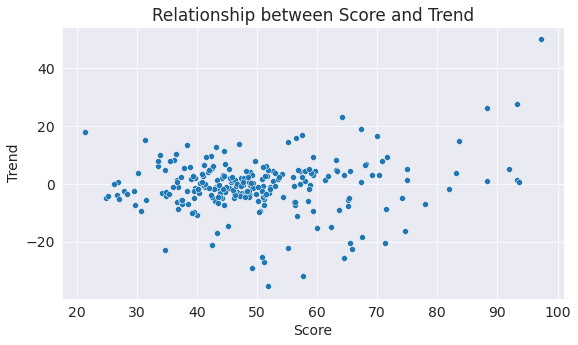

In [20]:
sns.scatterplot(data=df, x='Score', y='Trend').set(title="Relationship between Score and Trend");

The 'Score' column has a wide range of values, indicating varying performance levels.
The 'Trend' column shows both positive and negative trends, suggesting fluctuating performance over time.
There is a positive correlation between 'Score' and 'Trend', suggesting that higher scores are associated with positive trends.

**Bar chart to explore the distribution of 'Class' column**

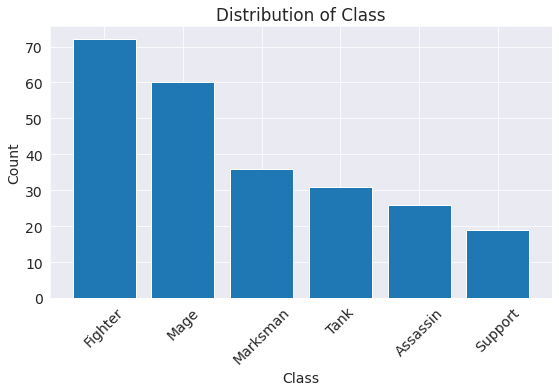

In [21]:
class_counts = df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.xticks(rotation=45)
plt.show()

The dominant classes are 'Fighter' and 'Mage', which means that more champions were created for those specific Classes.

**Visualize the distribution of 'Score' for each 'Class':**

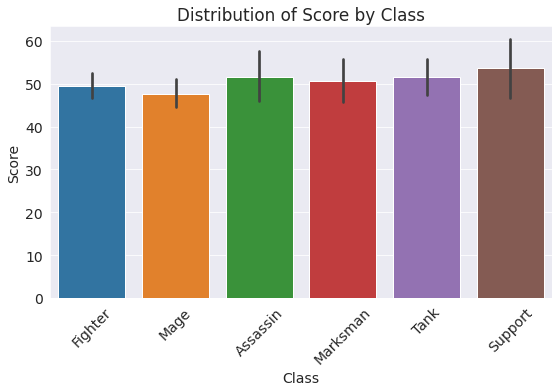

In [22]:
sns.barplot(data=df, x='Class', y='Score').set_title("Distribution of Score by Class")
plt.xticks(rotation=45)
plt.show()

Looks like the distribution of scores by classes is relatively equal, but for some classes like Fighter and Mage the variation is lower.

**Visualize the distribution of roles and tiers**

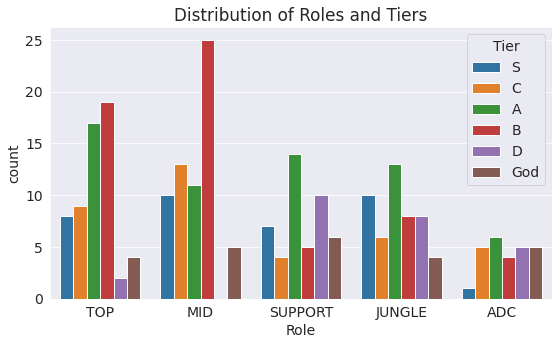

In [23]:
sns.countplot(data=df, x='Role', hue='Tier')
plt.title('Distribution of Roles and Tiers')
plt.legend(title='Tier')
plt.show()


By looking at this we can see that the highest amount of champions in higher tiers are in MID and in the ADC there are way less overall and the distribution is almost equal.

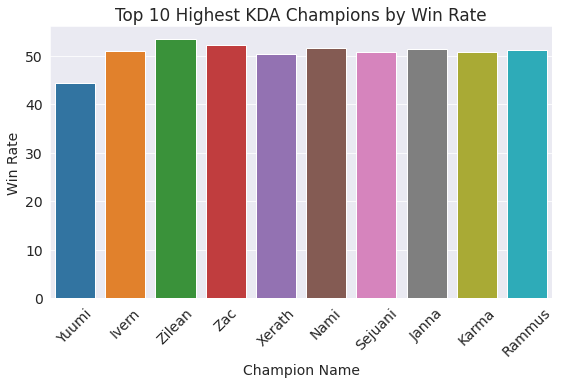

In [24]:
top_10_kda = df.nlargest(10, 'KDA')
sns.barplot(data=top_10_kda, x='Name', y='Win %')
plt.title('Top 10 Highest KDA Champions by Win Rate')
plt.xlabel('Champion Name')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.show()

Here we can see the top 10 Highest KDA champions and their winrate. And by looking at the first one we can see that KDA is not always relevant when talking about how much a champion is winning.

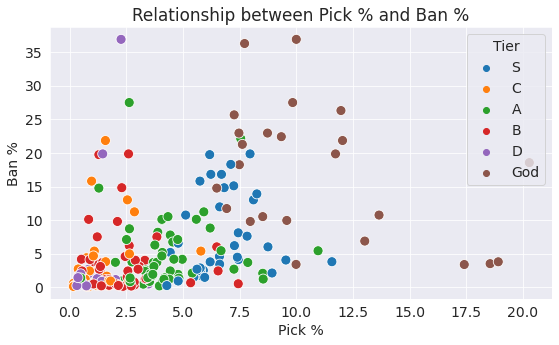

In [25]:
sns.scatterplot(data=df, x='Pick %', y='Ban %', hue='Tier', s=100)
plt.title('Relationship between Pick % and Ban %');

We can see that the pick and ban rates are relatively stacked. But also if the tier is higher, the pick and ban rates are also high.

## Asking and Answering Questions

### Here we'll ask and answer some questions related to our dataset

#### Q1: Which champions are the most played?

In [26]:
sorted_df = df.sort_values(by='Pick %', ascending=False)
top_10_pick_rates = sorted_df.head(10)
print(top_10_pick_rates['Name'])

23     Caitlyn
72      Kai'Sa
39      Ezreal
69        Jhin
99         Lux
113       Nami
65         Jax
153     Samira
224      Yasuo
200      Varus
Name: Name, dtype: object


The provided information shows the top 10 most played champions based on their pick rates. These champions are frequently chosen by players in the game.
Note that these rankings are based on the pick rates at the time the data was collected. Pick rates may change over time as the meta and player preferences evolve.

#### Q2: In which role are the most champions played?

In [27]:
role_counts = df['Role'].value_counts()
most_played_role = role_counts.idxmax()
print("Most Played Role:", most_played_role)

Most Played Role: MID


We can see that the most dominant role for the champions is MID. That is mostly because the MID role is versatile allowing different Classes of champions to be played.

#### Q3: Which class of champions is the most played?

In [28]:
class_counts = df['Class'].value_counts()
most_played_class = class_counts.idxmax()
print("Most Played Class:", most_played_class)

Most Played Class: Fighter


In [29]:
fighters_df = df[df['Class'] == 'Fighter']
role_counts = fighters_df['Role'].value_counts()
print(role_counts)


TOP        35
JUNGLE     21
MID        13
ADC         2
SUPPORT     1
Name: Role, dtype: int64


We can see that the most played class is Fighter because it is distributed in three different roles. Fighters can go TOP, JUNGLE and MID.

#### Q4: Which champions are least played?

In [30]:
lowest_winrates = df.sort_values('Win %', ascending=True).head(10)
lowest_pickrates = df.sort_values('Pick %', ascending=True).head(10)
least_played_df = pd.DataFrame({'Pick Rate': lowest_pickrates['Pick %'].values,
                       'Win Rate': lowest_winrates['Win %'].values},
                      index=lowest_pickrates['Name'])
least_played_df

,Pick Rate,Win Rate
Name,,
Ivern,0.14,44.03
Skarner,0.17,44.36
Quinn,0.17,44.44
Neeko,0.21,45.89
Annie,0.21,45.92
Shyvana,0.22,45.98
Kennen,0.25,46.17
Kled,0.29,46.31
Ziggs,0.32,46.47


In this we can see that if a champion has a very low winrate, it automatically has a very low pick rate which means that players are going for winning champs in general.

#### Q5: What roles and champions in those roles have the lowest and highest KDA's?

In [31]:
grouped_roles = df.groupby('Role')

for role, group in grouped_roles:
    print(f"Role: {role}")
    lowest_kda = group.nsmallest(10, 'KDA')
    print(lowest_kda[['Name', 'KDA']])
    print()

Role: ADC
             Name   KDA
12       Aphelios  1.95
226         Yasuo  2.00
202         Vayne  2.09
34         Draven  2.12
73        Kalista  2.22
90        Kog'Maw  2.23
121         Nilah  2.23
108  Miss Fortune  2.26
77        Karthus  2.28
97         Lucian  2.29

Role: JUNGLE
          Name   KDA
107  Master Yi  2.13
66         Jax  2.21
216    Warwick  2.21
135     Qiyana  2.23
87     Kindred  2.26
223   Xin Zhao  2.30
234        Zed  2.31
125       Olaf  2.33
145     Rengar  2.35
18    Bel'Veth  2.39

Role: MID
             Name   KDA
224         Yasuo  1.75
59         Irelia  1.85
227          Yone  1.94
57   Heimerdinger  2.01
21          Brand  2.04
144      Renekton  2.06
201         Varus  2.08
32          Diana  2.09
134        Qiyana  2.09
16           Azir  2.12

Role: SUPPORT
             Name   KDA
20          Brand  1.85
130      Pantheon  1.92
103      Malphite  1.96
238         Ziggs  2.04
119         Neeko  2.06
109  Miss Fortune  2.08
196        Twitch  2.09

We can see that the highest KDA's are for ADC, and the lowest for TOP. That's because on TOP are played mostly tanks which are not damage dealers and ADC are the main source of the damage in a team.

## Inferences and Conclusion

**We analyzed this dataset and have seen which champions are the most or least played based on different factors. We came to the conclusion that if a champion's winrate is high the pick rate, ban rate and also the tier are also high. Looking at the KDA of the champion is meaningless when choosing it. And also the trend always goes both down and up, meaning that there is always variation with almost each patch in terms of what is good and not.** 

## References and Future Work

**This dataset can be used to do different analysis for a specific patch. So considering that each patch can have a drastic change in what is played, it can be used as a reference to compare different patches in the game.**

In [ ]:
import jovian
project_name = "best-league-of-legends-champions-to-play-in-s13-patch-13.1"
jovian.commit(project=project_name, files=['league-of-legends-champion-stats-13.1.csv'])

<IPython.core.display.Javascript object>